<a href="https://colab.research.google.com/github/aisehiradamla/Rogers_stock_price_prediction/blob/main/Rogers_stock_price_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ROGERS STOCK PRICE PREDICTION**

Rogers Communications Inc. is a Canadian telecommunications company that provides wireless, cable TV, internet, and home phone services. As with any publicly traded company, its stock price can be subject to various factors such as economic conditions, industry trends, and company performance.

**PROBLEM STATEMENT** 

The aim of this project is to predict the future stock price of Rogers Communications Inc. (RCI-B.TO) using machine learning and deep learning algorithms. To achieve this, we will collect and analyze 5 years of historical data from Yahoo Finance. We will use technical analysis to understand how supply and demand affect stock prices and explore the potential impact of the 8 July 2022 Rogers Internet outage on investor behavior and stock market prices.

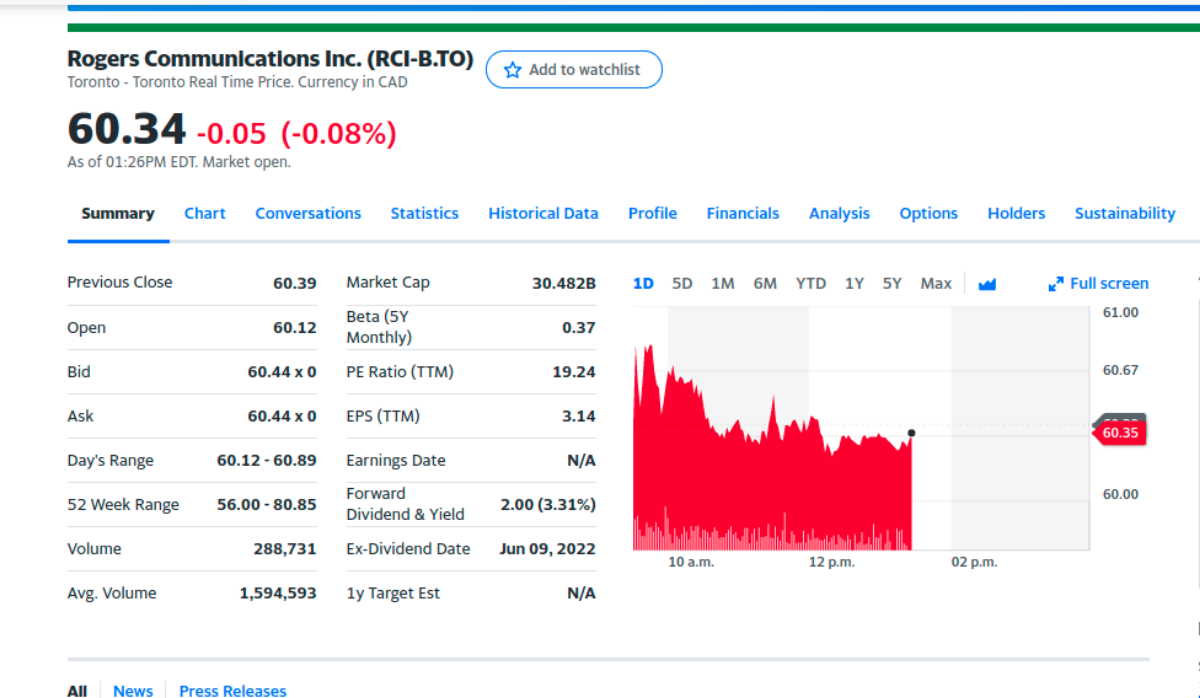

*The concept of beta measures how much a stock is expected to move in relation to the movements of the overall market. A beta greater than 1.0 indicates that the stock is more volatile than the broader market, while a beta less than 1.0 suggests a stock with lower volatility. In the case of Rogers stock, the beta ratio is 0.37 according to the summary statistics, which indicates lower volatility. However, the return rate may be lower as well since the risk ratio is also low. It's worth noting that some companies, like Rogers, pay dividends, while others don't.

*When buying or selling stocks, the most common method is through an auction process where buyers and sellers place bids and offers. A bid is the price at which someone wants to buy a stock, while an offer (or ask) is the price at which someone wants to sell a stock. When the bid and ask prices match, a trade is made. This process allows market participants to negotiate the price of a stock based on supply and demand, and it's how stocks are traded on exchanges.

**1**)**ROGERS** **STOCK** **MARKET** **PREDICTION** **WITH** **SIMPLE** **MOVING** **AVERAGE** 

The Simple Moving Average (SMA) is a commonly used technical analysis indicator that calculates the average of a stock's price over a given period of time. In this project, we use the SMA to make predictions for future stock prices based on the historical moving average.



In [ ]:
#LIBRARY 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 

In [ ]:
dataset=pd.read_csv('/content/ROGERS_STOCK_PRICE .csv')

In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-20,65.089996,65.800003,64.620003,64.879997,55.506050,1304000
1,2017-07-21,65.129997,65.910004,64.680000,65.889999,56.370132,1002600
2,2017-07-24,65.709999,66.320000,65.470001,66.050003,56.507011,661100
3,2017-07-25,65.540001,66.099998,64.989998,65.040001,55.642941,787900
4,2017-07-26,65.220001,65.230003,64.580002,64.750000,55.394848,789100
...,...,...,...,...,...,...,...
1249,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700
1250,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900
1251,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100
1252,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800


In [ ]:
dataset.shape

(1254, 7)

*Data collected from 2017 July to 2022 July.  

*Data has 1254 rows and 7 columns.  

In [ ]:
dataset=dataset.set_index(pd.DatetimeIndex(dataset["Date"].values)) # We need to index date 

In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
2017-07-20,2017-07-20,65.089996,65.800003,64.620003,64.879997,55.506050,1304000
2017-07-21,2017-07-21,65.129997,65.910004,64.680000,65.889999,56.370132,1002600
2017-07-24,2017-07-24,65.709999,66.320000,65.470001,66.050003,56.507011,661100
2017-07-25,2017-07-25,65.540001,66.099998,64.989998,65.040001,55.642941,787900
2017-07-26,2017-07-26,65.220001,65.230003,64.580002,64.750000,55.394848,789100
...,...,...,...,...,...,...,...
2022-07-13,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700
2022-07-14,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900
2022-07-15,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100
2022-07-18,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800


In [ ]:
dataset.isnull().sum() # Checking the missing value 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There is no missing value in the data. 

In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1.254000e+03
mean,63.369888,63.878190,62.850989,63.366491,58.503948,1.169180e+06
std,5.021083,4.988879,5.075095,5.034170,4.759383,8.419055e+05
min,49.459999,51.650002,46.810001,47.270000,43.901943,7.370000e+04
25%,59.700001,60.112500,59.202500,59.720001,55.124070,6.953000e+05
50%,63.644998,64.079998,63.225001,63.695000,58.555860,9.391000e+05
75%,67.037501,67.447498,66.440002,66.955000,61.800898,1.338625e+06
max,76.300003,80.849998,75.120003,76.070000,75.464249,7.634700e+06


**Data release in 5 years. This disclosure is important for portfolio building and is also very important in stock analysis, for example it provides details about the company's max and min value in 5 years, which may affect the investor's decision.

** The profit or loss calculation is based on the closing price of a stock that day, that is why we should consider the closing price as the target variable. In the graph we can see ROGERS close prices over the years.  

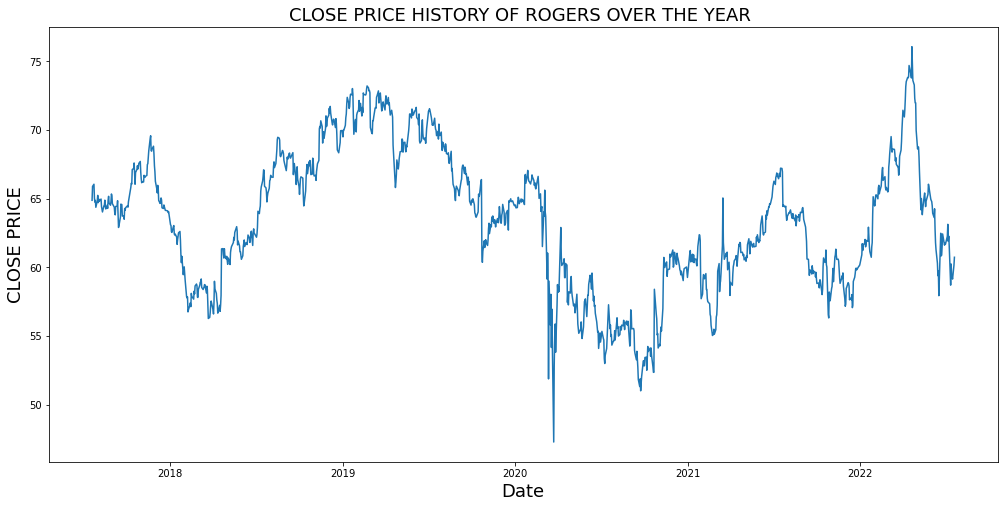

In [ ]:
#Visualize the closing price history 
plt.figure(figsize=(17,8))
plt.title("CLOSE PRICE HISTORY OF ROGERS OVER THE YEAR ", fontsize=18)
plt.plot(dataset["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("CLOSE PRICE", fontsize=18)
plt.show()

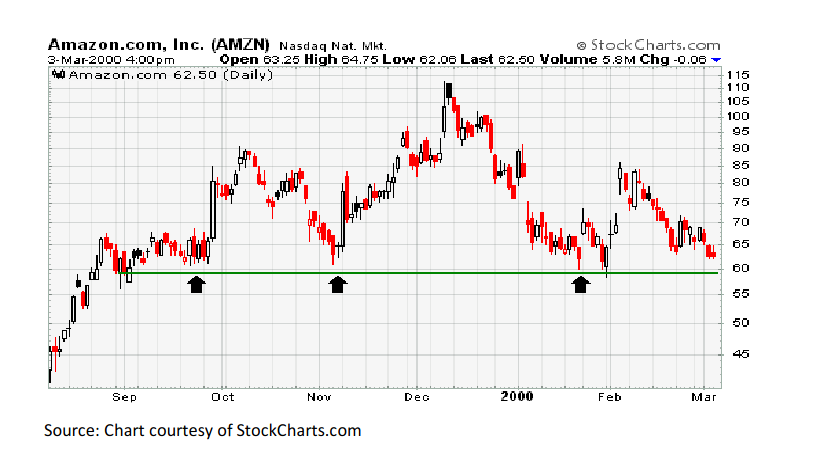

**Support and Resistance**

*At the intersection of supply and demand lie two essential concepts in trading: support and resistance.

Support is a crucial price level where market participants perceive strong demand, halting the decline in the asset's price. This level is where many investors see value and are willing to purchase the asset, leading to an increase in demand. When the asset's price approaches the support level, it is expected that the demand will exceed the supply, preventing the price from dropping below the support level.

 
A **resistance** level is the top price of the trading range, where most investors are willing to sell a security and most buyers are unwilling to buy it. At this point, supply exceeds demand and prices tend to fall. 

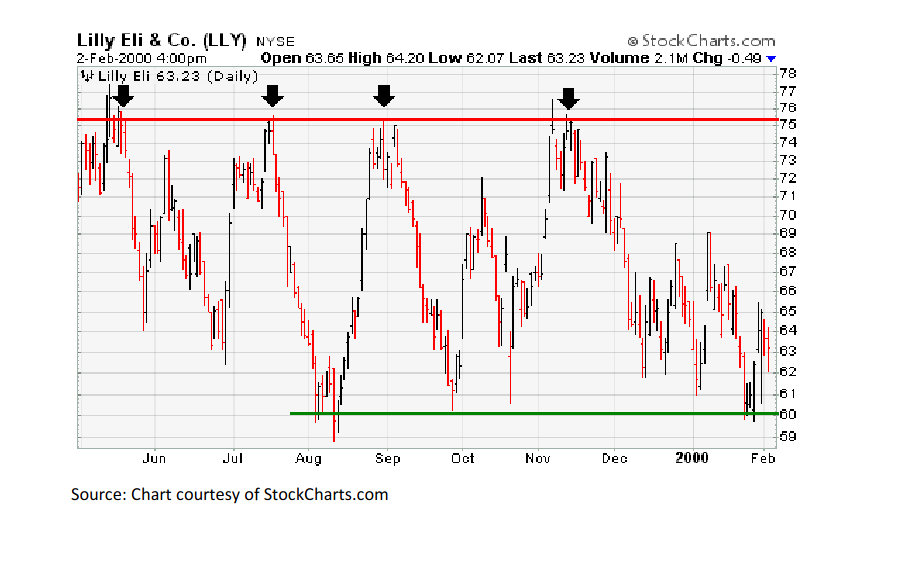

**NOTE**: Technical analysis relies heavily on the identification of significant support and resistance levels. Though determining precise levels of support and resistance can be challenging, technological advancements in machine learning have simplified this process, making it easier to identify these levels. By leveraging these tools, traders can receive buy and sell signals, allowing for more accurate analysis and forecasting of price movements.

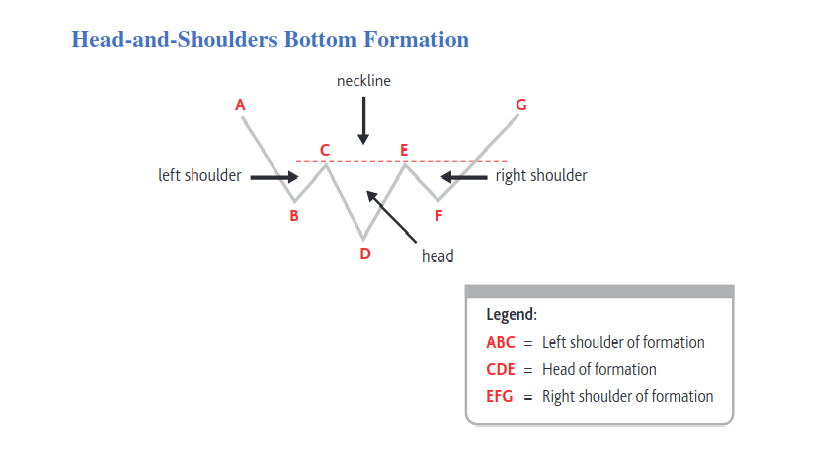

**A**-**B**: Indicates a decrease in price. 

**B**-**C**: Usually a minor rebound in price occurs without a significant increase in volume. 

**C**-**D**: Price drops to D again below left shoulder level (B), usually with increasing volume. 

**D**-**E**: This second recovery may not consist of a significant increase in volume. 

**E**-**F**: Another decline occurs, during which volume may or may not increase. 

**F**-**G**: Further recovery occurs; the greater the symmetry of the right shoulder to the left shoulder, the greater the reliability of the pattern. 

 
 

**Reversal patterns often occur before a large rise or fall in stock prices. Graphics are formed as a result of supply and demand in the market. For this reason, patterns are in a cycle that will repeat itself. 

 **SIMPLE** **MOVING** **AVERAGE** 

**The simple moving average (SMA) calculates the average of a selected price range, usually the closing prices, based on the number of periods in that range (Adam,2022) 

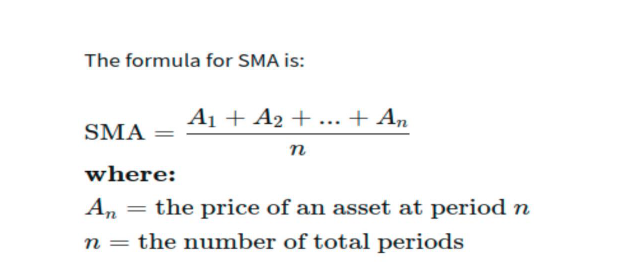

**To generate buy and sell signals in the market, I incorporated both 10-day and 50-day simple moving averages into my model. 

In [ ]:
#Create a function to calculate the SIMPLE MOVING AVERAGE (SMA)
def SMA (data, period=10, column="Close"):
  return data[column].rolling (window=period).mean()

In [ ]:
#Create two columns to store the 10 day and 50day SMA
dataset["SMA10"]=SMA(dataset,10)
dataset["SMA50"]=SMA(dataset,50)


In [ ]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,SMA10,SMA50
2017-07-20,2017-07-20,65.089996,65.800003,64.620003,64.879997,55.506050,1304000,NaN,NaN
2017-07-21,2017-07-21,65.129997,65.910004,64.680000,65.889999,56.370132,1002600,NaN,NaN
2017-07-24,2017-07-24,65.709999,66.320000,65.470001,66.050003,56.507011,661100,NaN,NaN
2017-07-25,2017-07-25,65.540001,66.099998,64.989998,65.040001,55.642941,787900,NaN,NaN
2017-07-26,2017-07-26,65.220001,65.230003,64.580002,64.750000,55.394848,789100,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-13,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700,61.291,63.1914
2022-07-14,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900,61.050,63.0032
2022-07-15,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100,60.796,62.8108
2022-07-18,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800,60.585,62.6524


**When we look at the result, we can see the average of SMA10 and SMA50. SMA10 means that last 10 days of close price average and SMA50 means last 50 days of close price average. 

In [ ]:
#GET BUY AND SELL SIGNAL 
dataset["Signal"]= np.where(dataset["SMA10"]> dataset["SMA50"],1,0)
dataset["Position"]=dataset["Signal"].diff()

dataset["buy"] =np.where(dataset["Position"]==1 , dataset["Close"],np.NAN)
dataset["Sell"]=np.where(dataset["Position"]==-1, dataset["Close"],np.NAN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'right upper '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


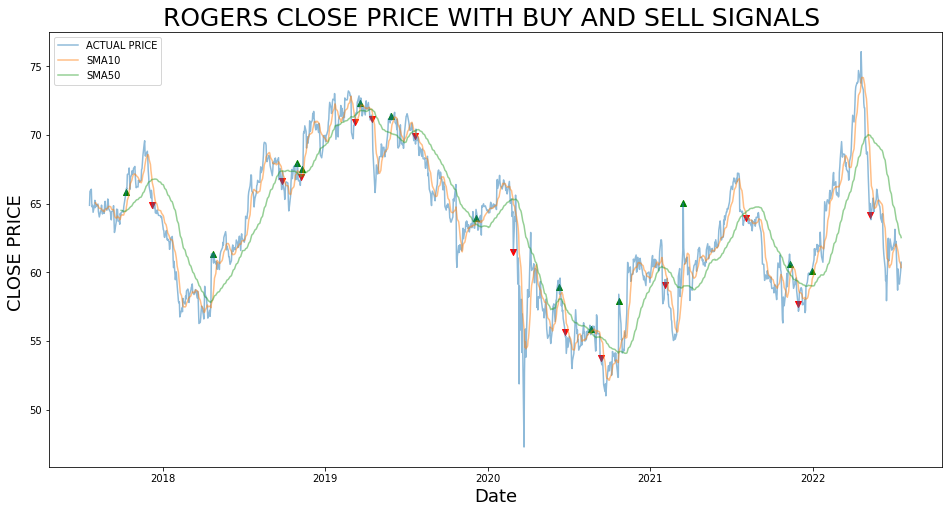

In [ ]:
#Visualize the result 
plt.figure(figsize=(16,8))
plt.title("ROGERS CLOSE PRICE WITH BUY AND SELL SIGNALS ", fontsize=25)
plt.plot(dataset["Close"], alpha=0.5, label="Close")
plt.plot(dataset["SMA10"], alpha=0.5, label="SMA10")
plt.plot(dataset["SMA50"], alpha=0.5, label= "SMA50")
plt.scatter (dataset.index,dataset["buy"], alpha= 1, label="buy Signal", marker="^" , color="green")
plt.scatter (dataset.index,dataset["Sell"], alpha= 1, label="Sell Signal", marker="v" , color="red")
plt.legend (['ACTUAL PRICE',"SMA10", "SMA50"], loc="right upper ")
plt.xlabel("Date", fontsize=18)
plt.ylabel("CLOSE PRICE ", fontsize=18)
plt.show()

**Upon analyzing the chart, it becomes apparent that the buy signal is represented by the color green while the sell signal is depicted by red. Looking at the first few periods of 2022, the intersection of SMA10 and SMA50 generated a buy signal that propelled prices upward. Conversely, the sell signal for 2022 appeared during a minor rebound in prices.

**ROGERS** **STOCK** **PRICES** **PREDICTION** **WITH** **LSTM** **MODEL** 

**Long** **short**-**term** **memory** (**LSTM**) is an artificial repetitive neural network (RNN) architecture used in the field of deep learning. LSTMs are a type of recurrent neural network that can learn order rules by storing important historical information. A common LSTM unit consists of an entry port, an exit port, and a forget port. The cell remembers values at arbitrary intervals of time, and three gates regulate the flow of information in and out of the cell. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
data_lstm=pd.read_csv("/content/ROGERS_STOCK_PRICE .csv") 

In [ ]:
data_lstm

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-20,65.089996,65.800003,64.620003,64.879997,55.506050,1304000
1,2017-07-21,65.129997,65.910004,64.680000,65.889999,56.370132,1002600
2,2017-07-24,65.709999,66.320000,65.470001,66.050003,56.507011,661100
3,2017-07-25,65.540001,66.099998,64.989998,65.040001,55.642941,787900
4,2017-07-26,65.220001,65.230003,64.580002,64.750000,55.394848,789100
...,...,...,...,...,...,...,...
1249,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700
1250,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900
1251,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100
1252,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800


In [ ]:
data_lstm=data_lstm.set_index(pd.DatetimeIndex(data_lstm["Date"].values))

In [ ]:
data_lstm

,Date,Open,High,Low,Close,Adj Close,Volume
2017-07-20,2017-07-20,65.089996,65.800003,64.620003,64.879997,55.506050,1304000
2017-07-21,2017-07-21,65.129997,65.910004,64.680000,65.889999,56.370132,1002600
2017-07-24,2017-07-24,65.709999,66.320000,65.470001,66.050003,56.507011,661100
2017-07-25,2017-07-25,65.540001,66.099998,64.989998,65.040001,55.642941,787900
2017-07-26,2017-07-26,65.220001,65.230003,64.580002,64.750000,55.394848,789100
...,...,...,...,...,...,...,...
2022-07-13,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700
2022-07-14,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900
2022-07-15,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100
2022-07-18,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800


In [ ]:
#Creating new datafram with target varible close column
data1=data_lstm.filter(["Close"])
#converting the data1  to a numpy array
dataset1=data1.values
#get the number of rows to train the model on 70% of data is training 
train_data=math.ceil(len(dataset1)* 0.7)

In [ ]:
train_data

878

For training data we have 878 rows.

In [ ]:
#SCALE THE DATA (standardization of data )
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset1)
scaled_data

array([[0.61145823],
       [0.64652774],
       [0.65208344],
       ...,
       [0.41215274],
       [0.44722229],
       [0.46736111]])

In [ ]:
#created the scaled in train_data set
training_data=scaled_data[0:train_data,:]
#now spliting the data into x_train and y_train data set 
x_train=[]
y_train=[]

for i in range(60,len(training_data)):# start with last 60 days
  x_train.append(training_data[i-60:i,0]) #0 to 60 
  y_train.append(training_data[i,0])# start with 61 
  if i<=60:
    print(x_train) #past 60 value 
    print(y_train) # start with 61  predict value 


[array([0.61145823, 0.64652774, 0.65208344, 0.61701392, 0.60694444,
       0.61111122, 0.5937501 , 0.60972229, 0.62395826, 0.60555552,
       0.61493066, 0.60868066, 0.61458337, 0.59548604, 0.58784712,
       0.58194441, 0.59722226, 0.59826389, 0.61180552, 0.59548604,
       0.58958333, 0.59930552, 0.59097226, 0.61215285, 0.62152771,
       0.60451389, 0.59895823, 0.60798608, 0.62743042, 0.62222229,
       0.60277767, 0.59409712, 0.57951385, 0.57465278, 0.59583333,
       0.59652767, 0.6104166 , 0.57743063, 0.5427084 , 0.54791663,
       0.56909722, 0.60173604, 0.60069444, 0.60069444, 0.57152778,
       0.57187507, 0.56354167, 0.59062497, 0.58611118, 0.59270819,
       0.59618063, 0.59756955, 0.59409712, 0.60798608, 0.61527771,
       0.64409722, 0.65451399, 0.65243049, 0.68923622, 0.69201378])]
[0.7059027083333336]


**0.70 is predict value 

In [ ]:
#convert the x_train and y_train to numpy arrays for using lstm model
x_train, y_train=np.array(x_train),np.array(y_train)

In [ ]:
#RESHAPE DATA , lstm needs three dimension sample, time and feature 
x_train = np.reshape(x_train,(x_train.shape[0],60,1))
x_train.shape # three dimension 818 is sample 60 is time and 1 is feature means close price 

(818, 60, 1)

In [ ]:
#Build the artitecture of LSTM MODEL 
model= Sequential()
model.add(LSTM(60, return_sequences=True, input_shape=(x_train.shape[1], 1))) #60  neuron
model.add(LSTM(60, return_sequences=False))
model.add(Dense(25)) 
model.add(Dense(1))

In [ ]:
#COMPILE THE MODEL
model.compile (optimizer="adam" ,loss="mean_squared_error")

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

818/818 [==============================] - 36s 40ms/step - loss: 0.0049


In [ ]:
#creating the testing dataset
#Creating a new array containing scalled values from 818 to 1254
text_data=scaled_data[train_data-60:,:]
#now spliting text data to the x_text and y_text

x_text=[]
y_text=dataset1[train_data:,:] #actual text value for predict 

for i in range(60,len(text_data)):
  x_text.append(text_data[i-60:i,0])

In [ ]:
#convert to text data to numpy array for using lstm model 
x_text=np.array(x_text)

In [ ]:
#Reshape the data 
x_text.shape

(376, 60)

*we have two dimension sample and time but for lstm model we need three dimension and the last one is feature

In [ ]:
x_text=np.reshape(x_text, (x_text.shape[0],x_text.shape[1],1))

In [ ]:
x_text.shape

(376, 60, 1)

In [ ]:
#Get the models predicted prices values 
predictions=model.predict(x_text)
predictions=scaler.inverse_transform(predictions)

**Evaluate** **the** **model**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score 


In [ ]:
#Evaluate the model so we can do that by RMSE (root mean squared error)
rmse=np.sqrt(np.mean(predictions-y_text)**2) 
rmse

0.6310500700709566

In [ ]:
print('R2 Score: ', r2_score(y_text, predictions))
print('MSE: ', mean_squared_error(y_text, predictions))

R2 Score:  0.8624628778781301
MSE:  2.1837613690293924


*R2 score is 0.86 so model is good fit.

*MSE score is 2.18 is not bad.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'right upper '. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


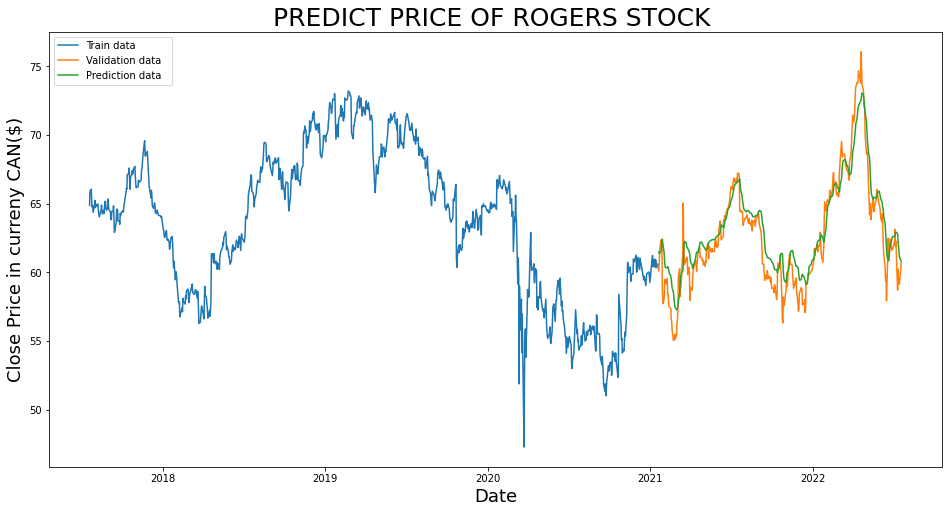

In [ ]:
#PLOT THE DATA 
train=data[:train_data ]
valid = data[train_data:]
valid["predictions"]=predictions

#VISUALIZE THE DATA 
plt.figure(figsize=(16,8))
plt.title("PREDICT PRICE OF ROGERS STOCK ", fontsize=25)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price in curreny CAN($)" , fontsize=18)
plt.plot(train["Close"])
plt.plot(valid[["Close" , "predictions"]])
plt.legend (['Train data ',"Validation data ", "Prediction data  "], loc="right upper ")
plt.show()

In [ ]:
#Show the valid and prediction prices 
valid 

,Date,Open,High,Low,Close,Adj Close,Volume,predictions
2021-01-20,2021-01-20,60.290001,60.349998,59.630001,60.099998,57.278675,906800,61.466534
2021-01-21,2021-01-21,60.180000,60.750000,60.020000,60.709999,57.860035,864400,61.378838
2021-01-22,2021-01-22,61.110001,61.549999,60.770000,61.509998,58.622478,783400,61.387001
2021-01-25,2021-01-25,61.540001,62.480000,61.299999,62.369999,59.442112,1059100,61.550774
2021-01-26,2021-01-26,62.240002,62.450001,61.669998,62.340000,59.413517,973100,61.877121
...,...,...,...,...,...,...,...,...
2022-07-13,2022-07-13,59.980000,60.459999,59.320000,59.439999,59.439999,760700,61.857868
2022-07-14,2022-07-14,59.130001,59.849998,58.939999,59.349998,59.349998,1557900,61.466602
2022-07-15,2022-07-15,59.470001,59.970001,58.750000,59.139999,59.139999,980100,61.142609
2022-07-18,2022-07-18,59.299999,60.160000,59.139999,60.150002,60.150002,860800,60.876602
